# GDP & Life Expectancy 
### INTRODUCTION

- This project explores the relationship between total GDP and the average life expectancy at birth for people in 6 countries - Chile (South America), China (Asia), Germany (Europe), Mexico (North America), USA (North America), and Zimbabwe (Africa).

- Several studies have been done over the decades to try to answer whether a relationship between GDP and life expectancy exists and many found some positive correlation. However, it’s crucial to recognise that the reality is far from simple.  While life expectancy may indeed increase with GDP at face value, there are other factors at play, such as how the money within the country is distributed among the people, how the money is spent (infrastructure, education, healthcare), and how the country makes it’s money in the first place (industrial activities, farming), all of which impact the average health and well-being of a nation.

- A 2000 paper by an economics professor Christopher J. Ruhm, titled “Are Recessions Good for Your Health?”, showed that when the American economy is doing well, the mortality rate actually *increases*, thought to be the result of increased air pollution. Yet, data from less developed nations, which increase their GDP mainly through farming activities, indicates that economic growth is associated with *better* overall health, implying that mortality is also affected by *how* a given country becomes wealthy in the first place.

### SCOPE

#### GOALS

- Understand what kind of relationship exists between life expectancy from birth and total GDP of a country.

#### ACTIONS

- If a relationship has been found:<br>
    1. What further analysis can be performed to analyse the relationship?
    2. What other possible factors can affect life expectancy of a country?
    3. What other data can be collected an analysed to further support this finding?
    4. What other features can be considered in the analysis (gender, different causes of death)?<br><br>
    
- If no relationship has been found or the results are inconclusive:<br>
    1. What other features can be considered in the analysis (gender, different causes of death)?
    2. What other possible data can be looked at to find out the impact a country's GDP on its people's health?
    
#### DATA

- The data is stored in an CSV file and contains 4 columns: Country, Year, Life expectancy at birth (years), GDP.

- There are 6 countries - Chile (South America), China (Asia), Germany (Europe), Mexico (North America), USA (North America), and Zimbabwe (Africa).

- For each country, the average life expectancy at birth and total GDP is quoted for each year from 2000 to 2015 (16 entries for each country).

- There are no missing data for any country.

- There are 96 entries in total.

#### ANALYSIS

**The independent variable is GDP, and the dependent variable is life expectancy;**

- average life expectancy per country bar chart 
- average GDP per country bar chart
- trend of GDP per country over the years
- trend of life expectancy per country over the years
- correlation of life expectancy and GDP per country (scatter graphs on single plot + individual)

### CONCLUSIONS

- There is a strong positive correlation between total GDP and life expectancy at birth for each of the 6 countries considered, assuming a linear relationship between the two features.<br>

- A clear positive trend in both, total GDP and average life expectancy at birth was observed for each country. Broadly speaking, the two trends appear to go hand-in-hand over the 15 year time scale.

- Over short time scales (year-on-year), this is not always the case, since during some years when GDP changed sharply, life expectancy at birth was either not affected or saw a change in the opposite direction to the GDP.<br>

- Looking at the average total GDP and average life expectancies at birth over the 15 years, it is apparent that the highest average GDP does not correspond to the highest average life expectancy at birth, even when the average total GDP is very large, such as for USA.<br>

- Overall, while a positive correlation is present, it is clear that GDP is not the direct factor that impacts average life expectancy at birth within a nation. It is possible that GDP affects some other factors, which in turn have a more direct impact on life expectancy. For example, GDP might affect access to education and healthcare differently in different countries, or GDP may correlate with medical infrastructure and access to the latest medical innovations within a country, all of which may play a role in determining how long an individual lives.<br>

In [23]:
#probing the data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('all_data.csv')

#print(df.head(17))
#print(df.count())
#print(df.dtypes)
#print(df.isnull().count())

df.GDP = df.GDP /1e9
df.rename(columns = {'Life expectancy at birth (years)': 'Life_expectancy', 'GDP': 'GDP_billion'},\
          inplace = True)
df.Country = df.Country.apply(lambda x: 'USA' if x == 'United States of America' else x)
#print(df.iloc[63:81])


#print(df.head())

    Country  Life_expectancy
0  Zimbabwe         50.09375
1     China         74.26250
2    Mexico         75.71875
3       USA         78.06250
4     Chile         78.94375
5   Germany         79.65625


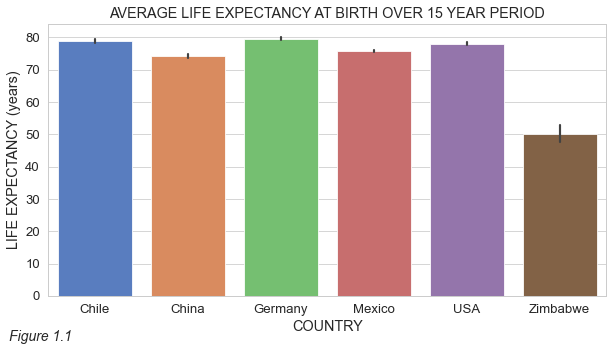

In [26]:
sns.set_context('paper', font_scale = 1.5)

#average life expectancy per country
df_groupby_country_life = df.groupby('Country').Life_expectancy.mean().reset_index()
df_groupby_country_life.sort_values('Life_expectancy', inplace = True)
df_groupby_country_life.reset_index(drop = True, inplace = True)
print(df_groupby_country_life)

def barplot_life():
    f = plt.figure(figsize = (10, 5))
    text = "Figure 1.1"
    plt.figtext(0.07, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
    
    sns.barplot(x = df.Country, y = df.Life_expectancy, palette = 'muted')
    #order = ['Zimbabwe', 'China', 'Mexico', 'USA', 'Chile', 'Germany']
    plt.title('AVERAGE LIFE EXPECTANCY AT BIRTH OVER 15 YEAR PERIOD')
    plt.xlabel('COUNTRY')
    plt.ylabel('LIFE EXPECTANCY (years)')
    
    sns.set_style('whitegrid')
    plt.show()

barplot_life()

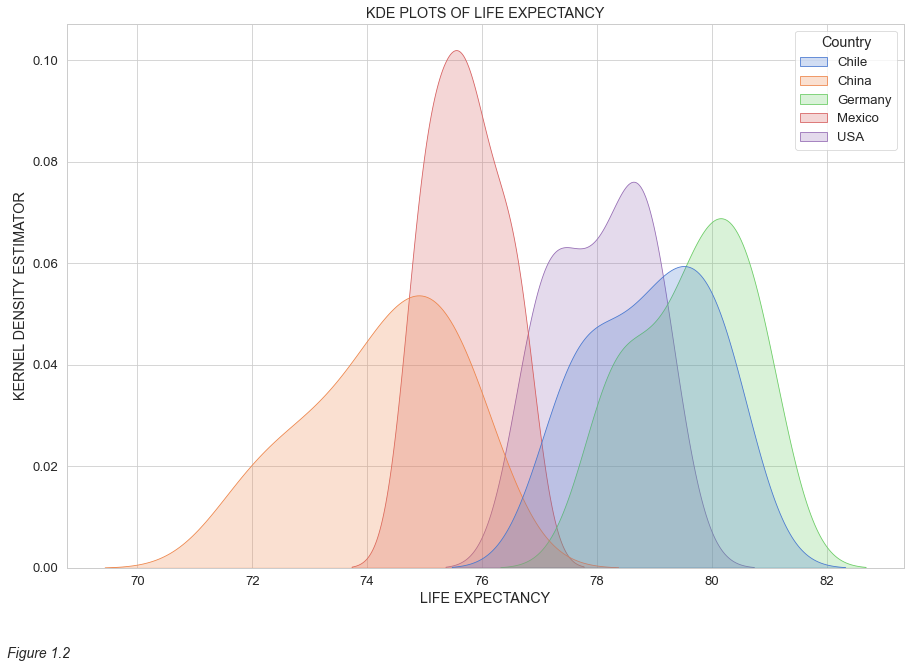

[1.0252857833306763, 1.2761636846423727, 0.9440396906380575, 0.6012681909930035, 0.8061288668693108]
5.993050834543018e-27
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Chile   China  -4.6812  0.001 -5.6584 -3.7041   True
  Chile Germany   0.7125 0.2582 -0.2646  1.6896  False
  Chile  Mexico   -3.225  0.001 -4.2021 -2.2479   True
  Chile     USA  -0.8812 0.0968 -1.8584  0.0959  False
  China Germany   5.3938  0.001  4.4166  6.3709   True
  China  Mexico   1.4563  0.001  0.4791  2.4334   True
  China     USA      3.8  0.001  2.8229  4.7771   True
Germany  Mexico  -3.9375  0.001 -4.9146 -2.9604   True
Germany     USA  -1.5938  0.001 -2.5709 -0.6166   True
 Mexico     USA   2.3438  0.001  1.3666  3.3209   True
------------------------------------------------------


In [7]:
#evaluating whether a statistically significant difference exists between the averages of life expectancy of
#all countries excluding Zimbabwe:

#assumptions of anova (f-oneway) test:
    #1. observations are randomly sampled from populations
    #2. samples are independent
    #3. samples are normally distributed
    #4. standard deviations are equal

#testing assumptions 3 and 4:


def kde_plots():
    f = plt.figure(figsize = (15, 10))
    text = "Figure 1.2"
    plt.figtext(0.07, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    sns.kdeplot(df.Life_expectancy.iloc[:80], hue = df.Country.iloc[:80], palette = 'muted', shade = True)

    plt.title('KDE PLOTS OF LIFE EXPECTANCY')
    plt.xlabel('LIFE EXPECTANCY')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    
    plt.show()
    
kde_plots()

#standard deviations:

stds = []

for i in range(5):
    std = np.std(df.Life_expectancy.iloc[i*16:(i+1)*16])
    stds.append(std)
print(stds)
#[1.0252857833306763, 1.2761636846423727, 0.9440396906380575, 0.6012681909930035, 0.8061288668693108]
#stds are not equal so it is unlikely that Anova test will yield valid results

#anova test:
#null hypothesis: no statistically significant difference exists between life expectancies of the 5 countries
#alternatice hypothesis: there is a statistically significant difference between life expectancies of the 5 countries
#significance threshold = 0.05

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

fstat, pval = f_oneway(df.Life_expectancy.iloc[:16], df.Life_expectancy.iloc[16:32], df.Life_expectancy.iloc[32:48],\
                       df.Life_expectancy.iloc[48:64], df.Life_expectancy.iloc[64:80])

print(pval)
#5.993050834543018e-27
#there is a very small chance that samples come from the same population with the same mean
#must reject the null hypothesis

#tukey's range test:

tukey_results = pairwise_tukeyhsd(df.Life_expectancy.iloc[:80], df.Country.iloc[:80], 0.05)
print(tukey_results)
#must reject the null hypothesis for all pairs EXCEPT for Chile-Germany and Chile-USA
#for Chile-Germany and Chile-USA there is no statistically significant difference between the means according to
#these tests

    Country   GDP_billion
0  Zimbabwe      9.062580
1     Chile    169.788845
2    Mexico    976.650625
3   Germany   3094.775625
4     China   4957.713750
5       USA  14075.000000


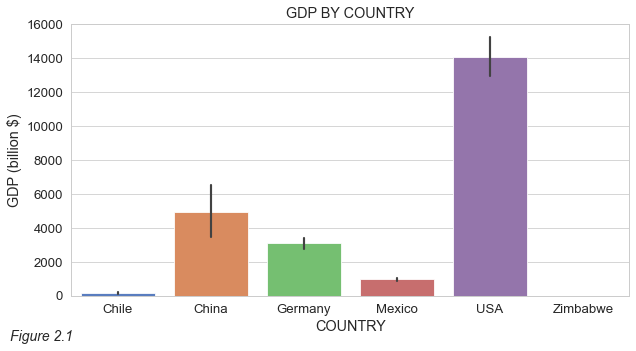

In [9]:
#average GDP per country
df_groupby_country_gdp = df.groupby('Country').GDP_billion.mean().reset_index()
df_groupby_country_gdp.sort_values('GDP_billion', inplace = True)
df_groupby_country_gdp.reset_index(drop = True, inplace = True)
print(df_groupby_country_gdp)


def barplot_gdp():
    f = plt.figure(figsize = (10, 5))
    text = "Figure 2.1"
    plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    sns.barplot(x = df.Country, y = df.GDP_billion, palette = 'muted')
    #order = ['Zimbabwe', 'Chile', 'Mexico', 'Germany', 'China', 'USA']
    plt.title('GDP BY COUNTRY')
    plt.xlabel('COUNTRY')
    plt.ylabel('GDP (billion $)')
    
    sns.set_style('whitegrid')
    
    plt.show()

barplot_gdp()

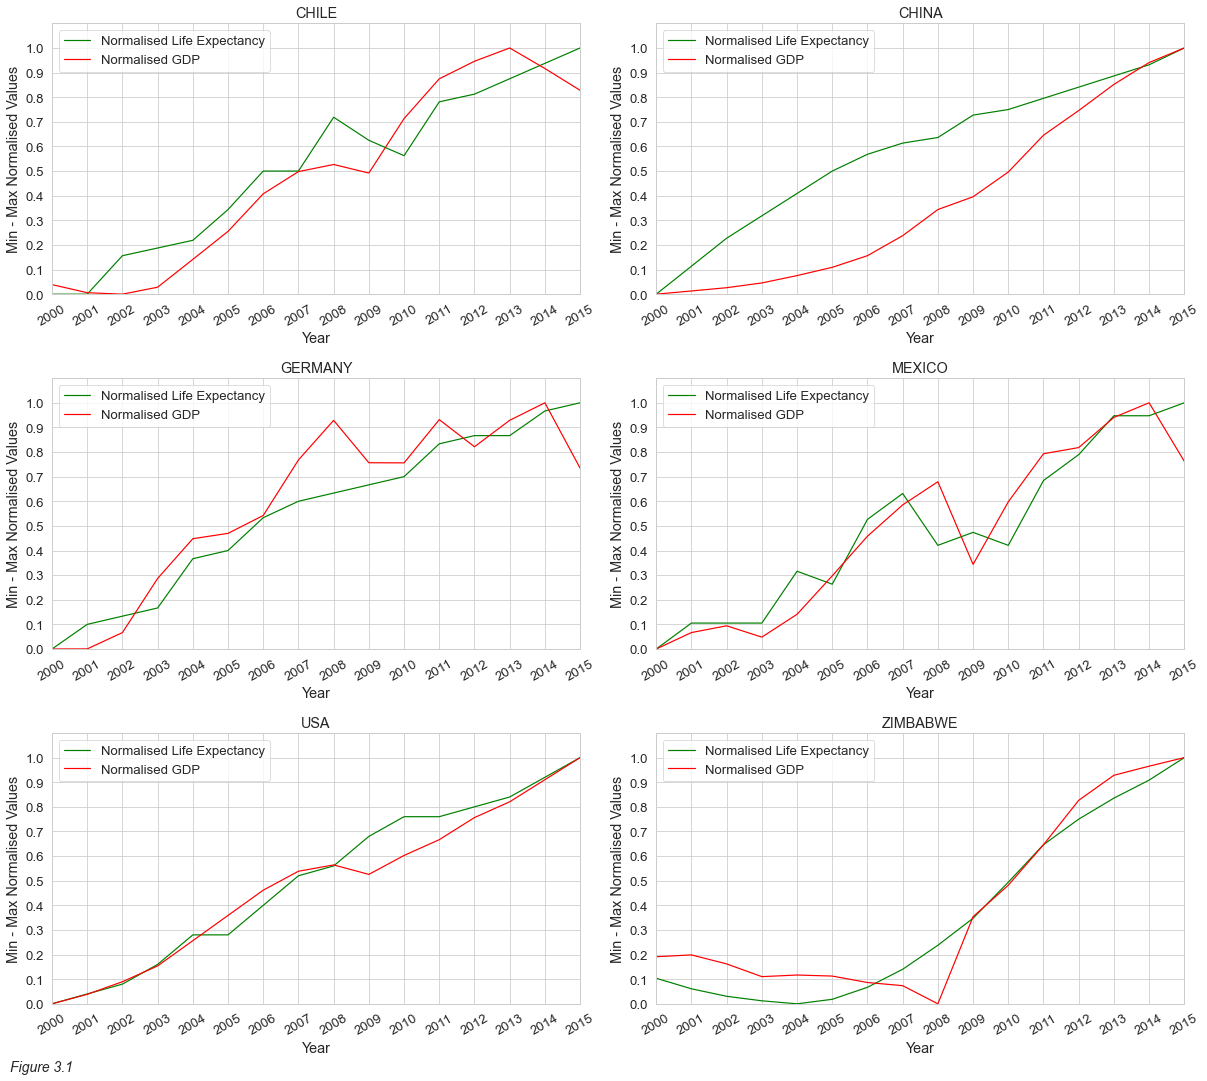

In [27]:
#trend of GDP and life expectancy by country over the years
#Min Max Normalisation so that can plot Life Expectancy and GDP on the same scale for each country:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

countries = df.Country.unique()

country_data_life_dfs = []
country_data_gdp_dfs = []

for i in range(len(countries)):
    
    country_data = df.iloc[i*16:(i+1)*16]
    country_data_life = scaler.fit_transform(country_data[['Life_expectancy']])
    country_data_life = np.reshape(country_data_life, -1)
    country_data_life = pd.Series(country_data_life)
    country_data_life_dfs.append(country_data_life)
    
    country_data_gdp = scaler.fit_transform(country_data[['GDP_billion']])
    country_data_gdp = np.reshape(country_data_gdp, -1)
    country_data_gdp = pd.Series(country_data_gdp)
    country_data_gdp_dfs.append(country_data_gdp)
    
all_normalised_life = pd.concat(country_data_life_dfs).reset_index(drop = True)
all_normalised_gdp = pd.concat(country_data_gdp_dfs).reset_index(drop = True)

df['Normalised_life_expectancy'] = all_normalised_life
df['Normalised_GDP'] = all_normalised_gdp
#print(df.head())

def gdp_life_trend():
    f = plt.figure(figsize = (17, 15))
    text = "Figure 3.1"
    plt.figtext(0.015, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    for i in range(6):
        ax = plt.subplot(3, 2, i+1)
        
        sns.lineplot(x = 'Year', y = 'Normalised_life_expectancy', data = df.iloc[i*16:(i+1)*16], color = 'g')
        sns.lineplot(x = 'Year', y = 'Normalised_GDP', data = df.iloc[i*16:(i+1)*16], color = 'r')
        
        plt.xticks(list(df.Year.iloc[:16]), rotation = 30)
        plt.yticks([x * 0.1 for x in range(11)])
        plt.axis(xmin = 2000, xmax = 2015, ymin = 0.0, ymax = 1.1)
    
        plt.title(countries[i].upper())
        plt.xlabel('Year')
        plt.ylabel('Min - Max Normalised Values')
        plt.legend(['Normalised Life Expectancy', 'Normalised GDP'])
    
    f.tight_layout()
    plt.show()

gdp_life_trend()

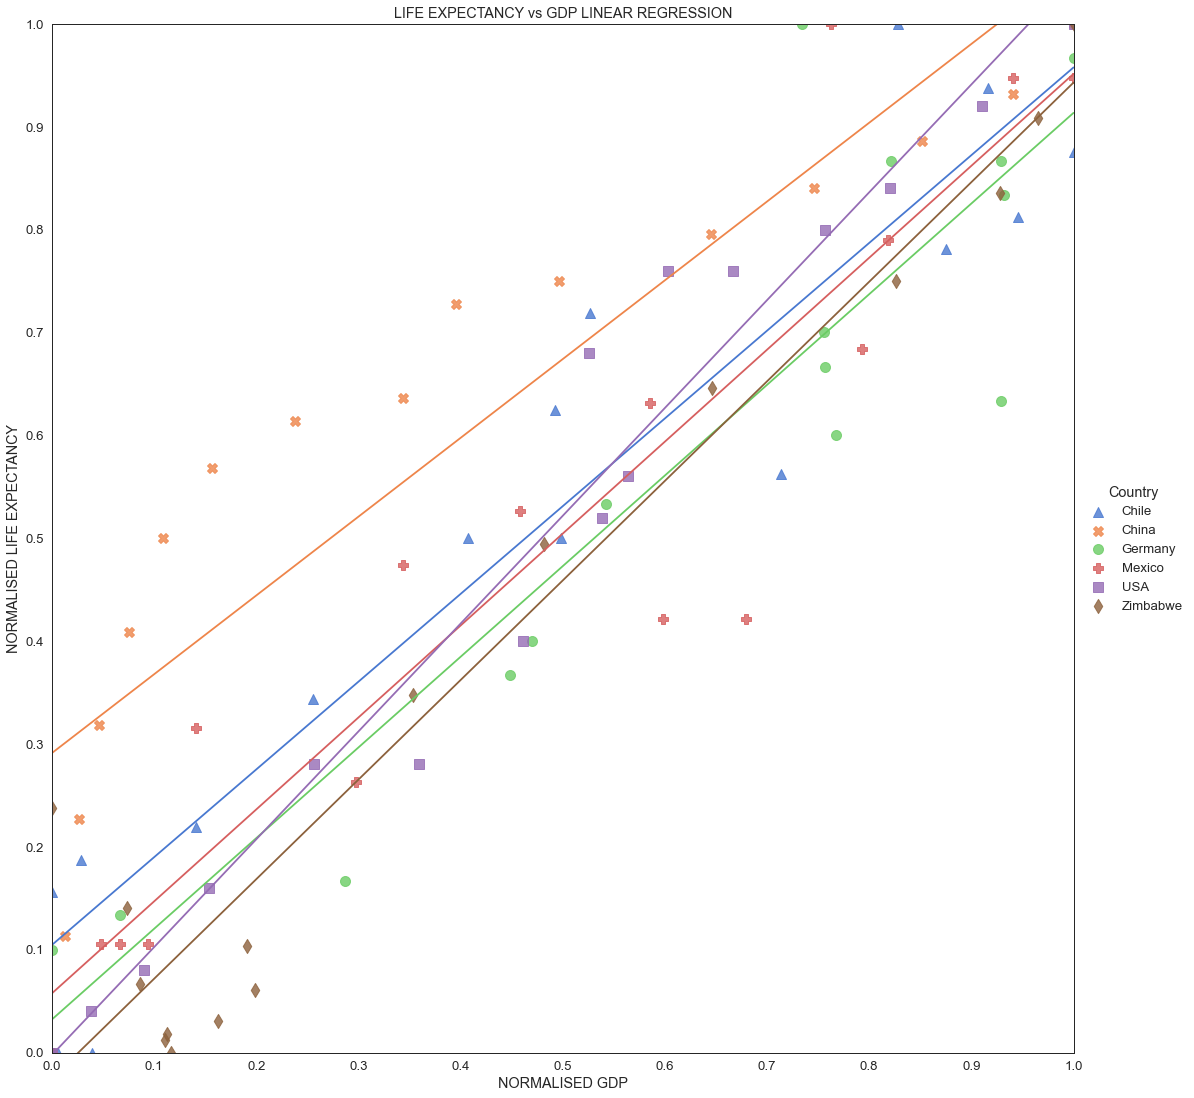

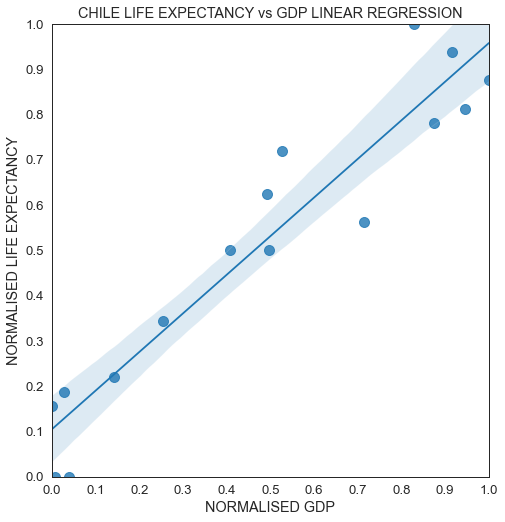

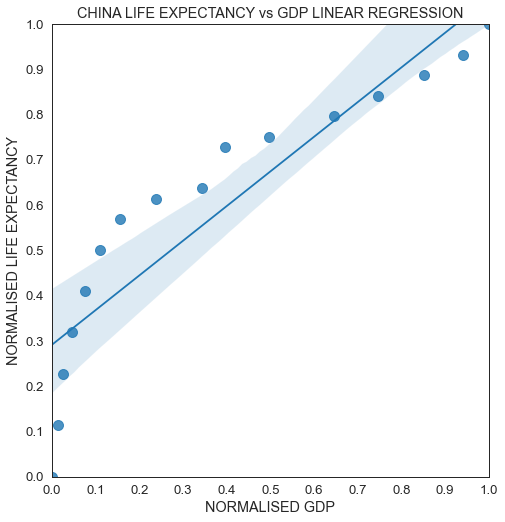

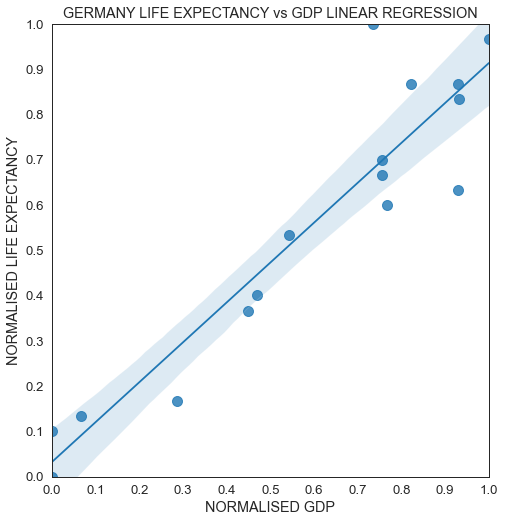

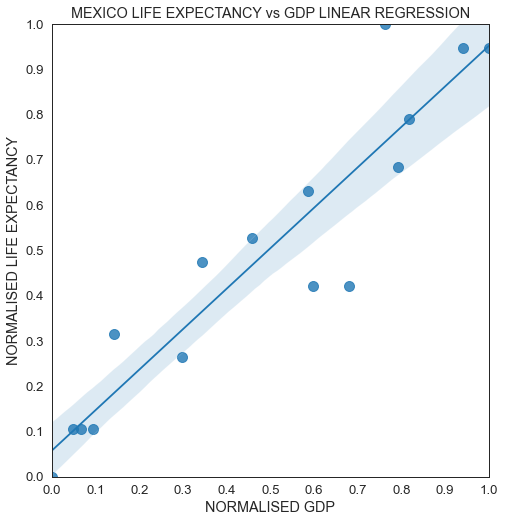

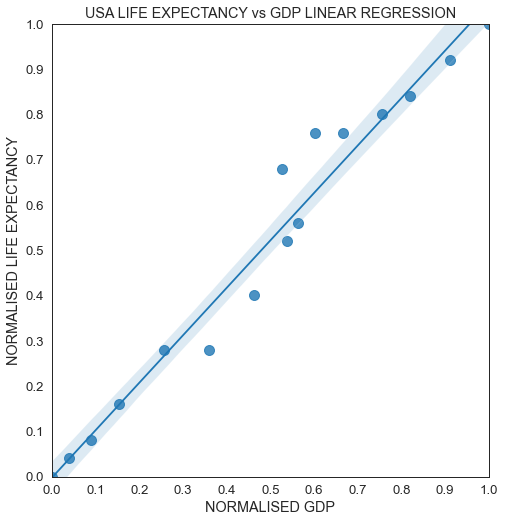

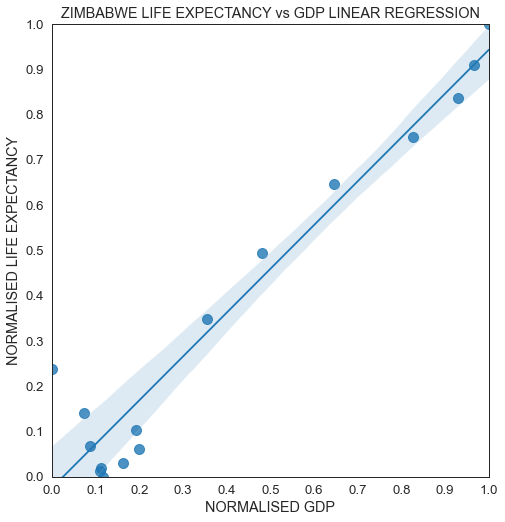

In [30]:
#correlation of life expectancy and GDP total:

def linear_regression_plot():
    sns.lmplot(x = 'Normalised_GDP', y = 'Normalised_life_expectancy', hue = 'Country', data = df, \
               height = 15, aspect = 1, markers = ['^', 'X', 'o', 'P', 's', 'd'], \
               palette = 'muted', scatter_kws = {"s": 100}, ci = None)
    
    plt.xticks([x * 0.1 for x in range(11)])
    plt.yticks([y * 0.1 for y in range(11)])
    plt.axis(xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0)
    
    sns.set_style('white')
    sns.despine(top = False, right = False)

    plt.title('LIFE EXPECTANCY vs GDP LINEAR REGRESSION')
    plt.xlabel('NORMALISED GDP')
    plt.ylabel('NORMALISED LIFE EXPECTANCY')
        
    plt.show()

linear_regression_plot()

def relational_scatter_plot():
    sns.relplot(x = "Normalised_GDP", y = "Normalised_life_expectancy", hue = "Country", data = df, \
                size = "Normalised_life_expectancy", \
                palette = 'Set1', sizes = (40, 400), alpha = 0.7, height = 15, aspect = 1)
    
    plt.xticks([x * 0.1 for x in range(11)])
    plt.yticks([y * 0.1 for y in range(11)])
    plt.axis(xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0)
    
    plt.title('LIFE EXPECTANCY vs GDP')
    plt.xlabel('NORMALISED GDP')
    plt.ylabel('NORMALISED LIFE EXPECTANCY')
        
    plt.show()

#relational_scatter_plot()

#the relational scatter graph is rather hard to read and the marker weights don't give any new information

#the linear regression plot seems to be good at telling only one thing - that some kind of positive correlation
#between GDP and life expectancy exists for each country (it's equally hard to read when they are all together.

#linear regression plots individually:
def individual_linear_regression_plots():
    for i in range(6):        
        sns.lmplot(x = 'Normalised_GDP', y = 'Normalised_life_expectancy', data = df.iloc[i*16:(i+1)*16], \
                palette = 'muted', height = 7, aspect = 1, scatter_kws = {"s": 100})
        
        sns.set_style('white')
        sns.despine(top = False, right = False)
        
        plt.xticks([x * 0.1 for x in range(11)])
        plt.yticks([y * 0.1 for y in range(11)])
        plt.axis(xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0)
    
        plt.title(f'{countries[i].upper()} LIFE EXPECTANCY vs GDP LINEAR REGRESSION')
        plt.xlabel('NORMALISED GDP')
        plt.ylabel('NORMALISED LIFE EXPECTANCY')
    
    plt.show()

individual_linear_regression_plots()

In [55]:
#individual countries linear regression correlation score evaluation:
from scipy.stats import pearsonr

correlations = []
p_values = []

for i in range(6):
    correlation, p = pearsonr(df.GDP_billion.iloc[i*16:(i+1)*16], df.Life_expectancy.iloc[i*16:(i+1)*16])
    correlations.append(correlation)
    p_values.append(p)
    
print(correlations)
print(p_values)

#a very strong, positive, linear relationship exists between GDP and life expectancy for all countries
#China has the weakest correlation coefficient out of the 6 countries, yet still strong

[0.9498766659254415, 0.9085255408648358, 0.9326988982561268, 0.9322377167847082, 0.9817092382430257, 0.9661998955858779]
[1.8659139746585596e-08, 1.1250985720700642e-06, 1.401881553404592e-07, 1.4686960248304982e-07, 1.7499709269099464e-11, 1.2358516366845632e-09]


### EVALUATION OF RESULTS

#### AVERAGE LIFE EXPECTANCY OVER 15 YEARS

- Initially, the average life expectancy at birth for each country was calculated. Figure 1.1 shows that, apart from Zimbabwe (Africa), the average life expectancy for the other 5 countries is fairly close, all within the range of 74-80 years. Germany has the highest life expectancy at birth  of 79.66 years, while Zimbabwe’s has the lowest average life expectancy of 50.09 years. China has the second lowest life expectancy of 74.26 years.<br>

- Further analysis was done to determine whether any statistically significant difference exists between Chile, China, Germany, Mexico, and USA (excluding Zimbabwe, since its life expectancy is so radically different).<br>

- For an Anova test, the following null and alternative hypotheses were formulated:<br>

	1. Null: there is no statistically significant difference between the average life expectancies of Chile, China, Germany, Mexico, and USA;
	2. Alternative: there is a statistically significant difference between the life expectancies of the above 5 countries, and their samples come from different populations with different life expectancy averages.<br><br>

- A significance threshold of p = 0.05 was set.<br>

- The following assumptions were made:<br>

	1. The average life expectancy per year for a given country was obtained by randomly sampling from the country’s population;
	2. Average life expectancy per year of a given country is independent from another country;
	3. Life expectancy over the 15 year period is approximately normally distributed for each country;
	4. The standard deviations of those distributions are approximately equal.<br><br>

- It is fair to assume that assumptions 1 and 2 are valid. To validate assumptions 3 and 4, a KDE plot was generated and the standard deviations calculated. From Figure 1.2, it can be seen that none of the distributions are normal, exhibiting a varying degree of skew and modality. China’s and Mexico’s distributions are the closes to normal, while USA, Chile and Germany appear to be bimodal. It is not immediately clear what feature could be the cause of this bimodality.<br>

- The standard deviations also did not validate the assumptions, with China’s standard deviation being more than twice that of Mexico.<br>

- If these facts were to be ignored, and the Anova test were to be carried out anyway, it would become apparent that there exists at least one pair of countries, for which there exists a statistically significant difference in average life expectancies, with a p value of 5.993e^-27.<br>

- Tukey’s Range test confirmed that for all pairs, apart from Chile-Germany and Chile-USA, one can reject the null hypothesis. For Chile-Germany and Chile-USA the test was not able to confirm that any statistically significant difference exists between the averages of their life expectancies.<br>

- However, since assumptions 3 and 4 are violated, it is not clear how meaningful the result of this test is.<br>

#### AVERAGE TOTAL GDP OVER 15 YEARS

- A 15 year average value of each country’s GDP was plotted and calculated. Unlike for life expectancy, these results are all strikingly different. USA has the highest total GDP average of 14,075.00 billion USD, while Zimbabwe has the lowest average GDP of 9.06 billion USD. Chile has the second lowest average GDP of 169.79 billion USD.<br>

- At this stage, it becomes clear that the relationship between high GDP and high life expectancy is not clear cut. The wealthiest country (USA) doesn’t have the highest life expectancy, even though its average GDP towers above the rest of the countries, including Germany, whose average life expectancy was the greatest.<br>

#### GDP AND LIFE EXPECTANCY TRENDS

- While averages are good at giving a rough idea of which country has the best or worst GDP and life expectancy, they are not helpful for finding trends. It’s important to consider how these features change and fluctuate together over the 15 years period.<br>

- In order to plot GDP and life expectancy trends on the same set of axes, the data was normalised by country using min-max normalisation.<br>

- Figure 3.1 shows the trend of normalised GDP and life expectancy, revealing that for each country a positive trend exists for both features, which, at first glance, seem to be closely related.<br>

- For Chile, Germany, Mexico, USA, and Zimbabwe, GDP and life expectancy seem to go hand-in-hand. However, upon closer inspection, when some countries experience a sharp rise or drop in GDP, this is not always accompanied by a rise or drop in life expectancy.<br>

- China’s GDP and life expectancy trend also follows a broad positive trend, however, the graph looks unusually smooth, which begs the question of whether there was a significant difference in how China's data was collected and if this could have introduced inaccuracies into the data.<br>

#### GDP AND LIFE EXPECTANCY CORRELATION

- To truly understand whether GDP affects life expectancy, if at all, one must consider the strength of the correlation between these features. For this, linear regression plots were generated and the correlation coefficients were calculated between GDP and life expectancy.<br>

- Figures 4.2 through 4.7 show the individual linear regression plots for each country. Chile, Germany, Mexico, USA, and Zimbabwe all show a strong positive correlation. China, too, shows this, however, the relationship may not be linear.<br>

- the Pearson correlation coefficients are as follows: <br><br>

	- Chile: 0.9498766659254415
	- Chine: 0.9085255408648358
	- Germany: 0.9326988982561268
	- Mexico: 0.9322377167847082
	- USA: 0.9817092382430257
	- Zimbabwe: 0.9661998955858779<br>

### CONCLUSIONS

- There is a strong positive correlation between total GDP and life expectancy at birth for each of the 6 countries considered, assuming a linear relationship between the two features.<br>

- A clear positive trend in both, total GDP and average life expectancy at birth was observed for each country. Broadly speaking, the two trends appear to go hand-in-hand over the 15 year time scale.

- Over short time scales (year-on-year), this is not always the case, since during some years when GDP changed sharply, life expectancy at birth was either not affected or saw a change in the opposite direction to the GDP.<br>

- Looking at the average total GDP and average life expectancies at birth over the 15 years, it is apparent that the highest average GDP does not correspond to the highest average life expectancy at birth, even when the average total GDP is very large, such as for USA.<br>

- Overall, while a positive correlation is present, it is clear that GDP is not the direct factor that impacts average life expectancy at birth within a nation. It is possible that GDP affects some other factors, which in turn have a more direct impact on life expectancy. For example, GDP might affect access to education and healthcare differently in different countries, or GDP may correlate with medical infrastructure and access to the latest medical innovations within a country, all of which may play a role in determining how long an individual lives.<br>

### FURTHER ACTIONS

- To dig deeper into the relationship between GDP and life expectancy, the following needs to be considered:<br>

	1. GDP per capita instead of total GDP;
	2. Leading causes of death for each country to identify outliers;
	3. More countries to represent each continent;
	4. More samples (longer time frame) for each country to identify potentially bigger trends;
	5. Different ways life expectancy can be quantified and the biases each one potentially introduces;
	6. How each country creates its economic wealth split into categories (industrial, technological, agricultural etc);
	7. Which countries are affected by war, environmental disasters, or national health crises to determine outliers;
	8. How the wealth in each country is distributed and where it is spent;
	9. The percentage of people in the country that have access to education, healthcare, clean water.